
Null Instances:

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


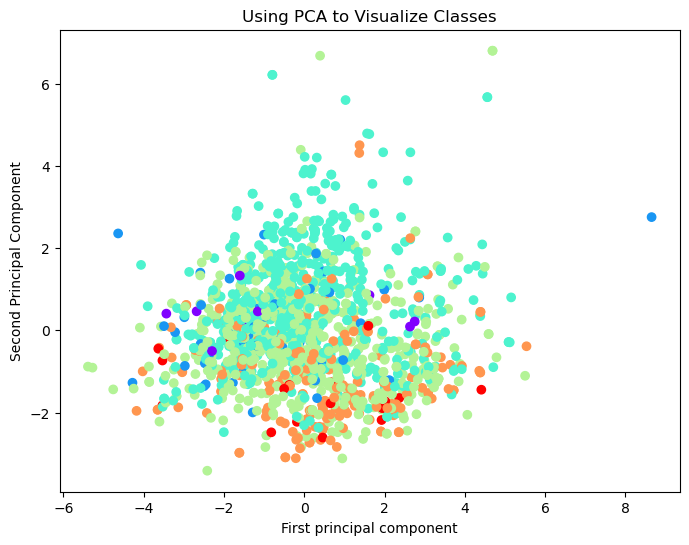

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA


data = pd.read_csv('winequality-red.csv', delimiter=';')

X = data.drop('quality', axis=1)
y = data['quality']

#checking for null instances
data = data.fillna(0)
print("\nNull Instances:\n")
print(data.isna().sum())

# PCA
X_pca = X.copy()
y_pca = y.copy()
X_pca = StandardScaler().fit_transform(X_pca)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_pca)

plt.figure(figsize=( 8,6))
plt.scatter(X_pca[:, 0],X_pca[:,1],c=y_pca,cmap='rainbow')
plt.xlabel('First principal component' )
plt.ylabel('Second Principal Component' )
plt.title("Using PCA to Visualize Classes" )
plt.show()

In [ ]:
#Getting the top features from the dataset
top_features = SelectKBest(score_func=chi2, k=11)

dfscores = pd.DataFrame(top_features.fit(X,y).scores_)  #Store predictor scores in a column
dfcolumns = pd.DataFrame(X.columns)  #Store predictor variable names in a column

#List of features with heaviest weight/importance
predScores = pd.concat([dfcolumns,dfscores],axis=1)
predScores.columns = ['Predictor','Score']   #naming the dataframe columns
print(predScores.nlargest(11,'Score'))       #print top (by score) 10 features

#Drop the bottom two features (smallest score)
data = data.drop('density', axis=1)
data = data.drop('pH', axis=1)

X= data.loc[:, 'fixed acidity':'alcohol']
y= data['quality']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=417)

wine_dataset_file = "winequality-red.csv"

full_df = pd.read_csv(wine_dataset_file, header = 0, delimiter=";")

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
print("Best Random Forest Parameters: ", best_rf)

y_pred = best_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=====================RANDOM FOREST CLASSIFIER=====================\n")
print("Accuracy: ", accuracy)
print('\nClassification Report: \n', report)

Best number of hidden nodes: 45, with a test accuracy of 0.61875, and a f1 score of 0.61875
Non normalized test accuracy of 0.43333333333333335


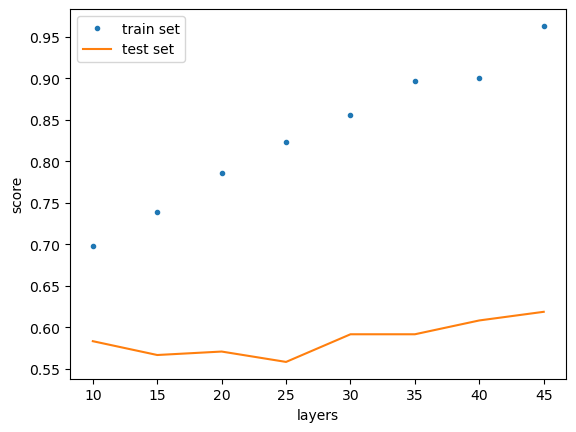

In [11]:
# Define the parameter grid for the ANN
param_grid = {
    'ann__hidden_layer_sizes': [(20,), (40,), (50,), (70,), (100,), (500,), (50, 50), (100, 100)],
    'ann__activation': ['tanh', 'relu', 'logistic'],
    'ann__solver': ['sgd', 'adam'],
    'ann__alpha': [0.0001, 0.001, 0.01],
    'ann__learning_rate': ['constant', 'adaptive'],
    'ann__learning_rate_init' : [0.01, 0.1, 0.2, 0.5, 1]
}

pipe = Pipeline([("norm", StandardScaler()),
                 ("ann", MLPClassifier(max_iter=1000, random_state=42))])

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipe, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)


pipe.set_params(**best_params)
pipe.fit(X_train, y_train)
# Predict the test set
y_pred = pipe.predict(X_test)

# Calculate the evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("=====================ANN CLASSIFIER=====================\n")

# Print the evaluation metrics
print("Accuracy: ", accuracy)
print("Classification Report: \n", report)





# ### HOW WE DID INITIAL TESTSING (AND GOT THE BEST OUTCOME)
# from sklearn.metrics import f1_score
# wine_dataset_file = "winequality-red.csv"
#
# full_df = pd.read_csv(wine_dataset_file, header = 0, delimiter=";")
#
# X = full_df.iloc[:, :-1]
# Y = full_df.iloc[:, -1]
#
# X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, random_state=417)
#
# train_score = []
# test_score = []
# f1s = []
#
# # more layers does not improve test data
# layers = list(range(10,50,5))
# for i in layers:
#     # scaling / normalizing data helps increase test
#     pipe = make_pipeline(StandardScaler(), MLPClassifier(activation = 'logistic',
#                                                          solver = 'sgd',
#                                                          hidden_layer_sizes = (i,), #tired multiple layers as well, cannot break ~ 0.60 for test
#                                                          alpha=1e-2,
#                                                          max_iter = 1000,
#                                                          learning_rate_init = 0.2))
#
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
#     train_score.append(pipe.score(X_train,y_train))
#     test_score.append(pipe.score(X_test,y_test))
#     f1s.append(f1_score(y_test, y_pred, average="micro"))
#
# plt.plot(layers,train_score,'.',label = 'train set')
# plt.plot(layers,test_score,'-',label = 'test set')
# plt.xlabel('layers')
# plt.ylabel('score')
# plt.legend()
#
# optimal_index = test_score.index(max(test_score))
# print(f'Best number of hidden nodes: {layers[optimal_index]}, with a test accuracy of {test_score[optimal_index]}, and a f1 score of {f1s[optimal_index]}')
#
# non_norm = MLPClassifier(activation = 'logistic',
#                          solver = 'sgd',
#                          hidden_layer_sizes = (layers[optimal_index]), #tired multiple layers as well, cannot break ~ 0.60 for test
#                          alpha=1e-2,
#                          max_iter = 1000,
#                          learning_rate_init = 0.2)
#
# non_norm.fit(X_train, y_train)
# y_pred = non_norm.predict(X_test)
# print(f'Non normalized test accuracy of {f1_score(y_test, y_pred, average="micro")}')